# Analyzing Ford GoBikes System Data¶
## By Tash Bettridge 

## Preliminary Wrangling

>Formerly known as Ford GoBike, renamed Lyft Bikes is a regional public bicycle sharing system in the San Francisco Bay Area, California.

### Data

The data will be analysed from the following:

* 2019 FordGo Bike and Baywheels Tripdata

### Process

The data wrangling steps that were involved in this project were:
- Step 1. Assessing the Data 
- Step 2. Preliminary Wrangling
- Step 3. Cleaning data
- Step 4. Univariate Exploration
- Step 5. Multivariate Exploration



### Step 1. Assessing the Data 

Data Analysis, storing data and data visualization of the wrangled data


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
import datetime
import matplotlib.ticker as tick
%matplotlib inline

In [2]:
#Retrieve the datasets from the User directory 
path = r'C:\Users\tash_\Desktop\Udacity\dataset'

In [3]:
# detect all of the files ending with a .csv name within a specific working directory
files = glob.glob(os.path.join(path, "*.csv"))


In [4]:
#use the pd.concat() method to stack every dataframe one on top of another.
df = pd.concat((pd.read_csv(f) for f in files), ignore_index = False)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [5]:
#Save a Copy To Master File
df.to_csv('baywheels_master.csv', index = False)



### Step 2. Preliminary Wrangling

In [6]:
# Read contents of Master File
df = pd.read_csv('baywheels_master.csv')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# Showing the first five rows of the newly combined dataset
df.describe()


,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude
count,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06
mean,2.789833e+04,8.076483e+02,1.427044e+02,3.776422e+01,-1.223459e+02,1.465047e+02,3.776506e+01,-1.223499e+02
std,1.146067e+05,1.974714e+03,1.214296e+02,2.392885e-01,7.080417e-01,1.223171e+02,1.363698e-01,3.089648e-01
min,4.000000e+00,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02
25%,1.952000e+03,3.590000e+02,4.300000e+01,3.777003e+01,-1.224117e+02,4.700000e+01,3.776931e+01,-1.224130e+02
50%,4.420000e+03,5.710000e+02,1.010000e+02,3.778076e+01,-1.223981e+02,1.050000e+02,3.778053e+01,-1.223983e+02
75%,9.682000e+03,8.870000e+02,2.390000e+02,3.779587e+01,-1.222934e+02,2.430000e+02,3.779539e+01,-1.222914e+02
max,9.999410e+05,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00


In [8]:
#Retrieve the first 10 samples of the data
df.sample(10)


,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
903110,1855,No,173,285.0,37.783521,-122.431158,Webster St at O'Farrell St,2019-05-26 20:29:02.1920,NaN,55.0,37.777053,-122.429558,Webster St at Grove St,2019-05-26 20:26:08.8860,Subscriber
1187874,746,No,1738,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-06-09 16:34:39.3520,NaN,400.0,37.804272,-122.433537,Buchanan St at North Point St,2019-06-09 16:05:41.1520,Customer
1207723,3515,No,634,321.0,37.780146,-122.403071,5th St at Folsom,2019-06-06 09:53:29.8760,NaN,124.0,37.760447,-122.410807,19th St at Florida St,2019-06-06 09:42:55.1960,Subscriber
502969,5294,No,451,23.0,37.791464,-122.391034,The Embarcadero at Steuart St,2019-03-17 13:26:15.4370,NaN,10.0,37.795393,-122.404770,Washington St at Kearny St,2019-03-17 13:18:43.4930,Subscriber
289314,4712,No,956,101.0,37.767079,-122.407359,15th St at Potrero Ave,2019-02-15 09:17:13.3630,NaN,52.0,37.777416,-122.441838,McAllister St at Baker St,2019-02-15 09:01:16.4390,Subscriber
1210647,22,No,992,77.0,37.773507,-122.416040,11th St at Natoma St,2019-06-05 20:57:55.7800,NaN,22.0,37.789756,-122.394643,Howard St at Beale St,2019-06-05 20:41:23.6390,Subscriber
760291,5839,No,510,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2019-04-11 20:06:16.5380,NaN,52.0,37.777416,-122.441838,McAllister St at Baker St,2019-04-11 19:57:46.0620,Subscriber
1229913,3693,No,1276,211.0,37.827757,-122.256716,Broadway at 40th St,2019-06-03 15:44:22.3190,NaN,157.0,37.846784,-122.291376,65th St at Hollis St,2019-06-03 15:23:06.0000,Subscriber
361136,577,No,873,81.0,37.775880,-122.393170,Berry St at 4th St,2019-02-04 12:34:31.1780,NaN,14.0,37.795001,-122.399970,Clay St at Battery St,2019-02-04 12:19:57.3000,Subscriber
1783010,10153,No,79,453.0,37.777934,-122.396973,Brannan St at 4th St,2019-09-21 14:37:03.6800,NaN,64.0,37.776754,-122.399018,5th St at Brannan St,2019-09-21 14:35:44.0060,Subscriber


In [9]:
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    2506983 non-null int64
bike_share_for_all_trip    2263724 non-null object
duration_sec               2506983 non-null int64
end_station_id             2424081 non-null float64
end_station_latitude       2506983 non-null float64
end_station_longitude      2506983 non-null float64
end_station_name           2424633 non-null object
end_time                   2506983 non-null object
rental_access_method       120838 non-null object
start_station_id           2426249 non-null float64
start_station_latitude     2506983 non-null float64
start_station_longitude    2506983 non-null float64
start_station_name         2426850 non-null object
start_time                 2506983 non-null object
user_type                  2506983 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [10]:
df.isnull().sum()


bike_id                          0
bike_share_for_all_trip     243259
duration_sec                     0
end_station_id               82902
end_station_latitude             0
end_station_longitude            0
end_station_name             82350
end_time                         0
rental_access_method       2386145
start_station_id             80734
start_station_latitude           0
start_station_longitude          0
start_station_name           80133
start_time                       0
user_type                        0
dtype: int64

In [11]:
# Check dataset for duplicated data
df.duplicated().sum()


0

In [12]:
#check for NaN data types
df.isna().sum()

bike_id                          0
bike_share_for_all_trip     243259
duration_sec                     0
end_station_id               82902
end_station_latitude             0
end_station_longitude            0
end_station_name             82350
end_time                         0
rental_access_method       2386145
start_station_id             80734
start_station_latitude           0
start_station_longitude          0
start_station_name           80133
start_time                       0
user_type                        0
dtype: int64

### Step 3. Cleaning Data 
There are some missing values in the dataset, such as start_station_id, start_station_name, end_station_id, end_station_name, rental_access_method. For more information please see below:

* Start/end times are not in the timestamp format

#### The following columns are not in object format:
* start_station_id
* end_station_id
* bike_id
* user_type
* rental_access_method

### Quality 

> There are some missing values and this will be sorted by converting some of the columns to the appropriate data types.


In [13]:
# Save the original data set and create a copy 
df_cleaned = df.copy()

### Define
Converting columns to the appropriate data types:
* Start_time and end_time to the timestamp format
* User type and rental_access_method for all to category format
* Bike ID, start station ID, and end station ID to object format


### Code 

In [14]:
# Converting the format to datetime
df_cleaned.start_time = pd.to_datetime(df_cleaned.start_time)
df_cleaned.end_time = pd.to_datetime(df_cleaned.end_time)

In [15]:
# Converting the user_type and rental_access_method to category format
df_cleaned.user_type = df_cleaned.user_type.astype('category')
df_cleaned.rental_access_method = df_cleaned.rental_access_method.astype('category')

In [16]:
# Convertng the bike_id, start_station_id, and end_station_id to object
df_cleaned.bike_id = df_cleaned.bike_id.astype(str)
df_cleaned.start_station_id = df_cleaned.start_station_id.astype(str)
df_cleaned.end_station_id = df_cleaned.end_station_id.astype(str)

### Test

In [17]:
df_cleaned.info(null_counts = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    2506983 non-null object
bike_share_for_all_trip    2263724 non-null object
duration_sec               2506983 non-null int64
end_station_id             2506983 non-null object
end_station_latitude       2506983 non-null float64
end_station_longitude      2506983 non-null float64
end_station_name           2424633 non-null object
end_time                   2506983 non-null datetime64[ns]
rental_access_method       120838 non-null category
start_station_id           2506983 non-null object
start_station_latitude     2506983 non-null float64
start_station_longitude    2506983 non-null float64
start_station_name         2426850 non-null object
start_time                 2506983 non-null datetime64[ns]
user_type                  2506983 non-null category
dtypes: category(2), datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 253.4+ MB


### Define
> Add columns for the start month, day of the week, and hour, along with figuring out the trip duration in minutes so I can create visuals based on workable units

### Code 

In [18]:
# Start time month (January - December)
df_cleaned['start_time_month'] = df_cleaned['start_time'].dt.strftime('%B')

In [19]:
# Start time month (1-12)
df_cleaned['start_time_month_num'] = df_cleaned['start_time'].dt.month.astype(int)

In [20]:
# Start time weekday
df_cleaned['start_time_weekday'] = df_cleaned['start_time'].dt.strftime('%a')

In [21]:
# Start and end time hour
df_cleaned['start_time_hour'] = df_cleaned['start_time'].dt.hour
df_cleaned['end_time_hour'] = df_cleaned['end_time'].dt.hour

In [22]:
# Duration in seconds to duration in minutes
df_cleaned['duration_min'] = df_cleaned['duration_sec']/60
df_cleaned['duration_min'] = df_cleaned['duration_min'].astype(int)

### Test 

In [23]:
df_cleaned.sample(3)


,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,...,start_station_longitude,start_station_name,start_time,user_type,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min
1319365,1321,No,1000,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2019-07-17 18:03:08.257,NaN,3.0,...,-122.404904,Powell St BART Station (Market St at 4th St),2019-07-17 17:46:27.595,Subscriber,July,7,Wed,17,18,16
1902172,3729,No,395,350.0,37.771431,-122.405787,8th St at Brannan St,2019-09-05 16:57:21.149,NaN,58.0,...,-122.417385,Market St at 10th St,2019-09-05 16:50:45.736,Subscriber,September,9,Thu,16,16,6
653622,388,No,833,86.0,37.769305,-122.426826,Market St at Dolores St,2019-04-27 11:12:16.538,NaN,5.0,...,-122.408445,Powell St BART Station (Market St at 5th St),2019-04-27 10:58:23.139,Subscriber,April,4,Sat,10,11,13


### Define

>Calculate the total distance traveled using the latitude and longitude in the data set

### Code

In [24]:
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371 # this is in kms

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    x = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    y = 2 * math.atan2(math.sqrt(x), math.sqrt(1 - x))
    z = radius * y

    return z

In [25]:
# Using the calcuated math on the columns for latidue and longitude
df_cleaned['distance_km'] = df_cleaned.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [26]:
# Converting the kilometers to miles
df_cleaned['distance_miles'] = df_cleaned['distance_km'] * 0.621371

### Test

In [27]:
df_cleaned.sample(5)


,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,...,start_time,user_type,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,distance_km,distance_miles
1792866,10321,No,346,56.0,37.773414,-122.427317,Koshland Park,2019-09-20 08:51:38.134,NaN,84.0,...,2019-09-20 08:45:51.826,Customer,September,9,Fri,8,8,5,0.738520,0.458895
1136741,3232,No,338,178.0,37.819381,-122.261928,Broadway at 30th St,2019-06-17 20:14:45.348,NaN,211.0,...,2019-06-17 20:09:06.667,Subscriber,June,6,Mon,20,20,5,1.037815,0.644868
1503258,10332,No,1079,24.0,37.789677,-122.390428,Spear St at Folsom St,2019-08-31 21:08:09.044,NaN,76.0,...,2019-08-31 20:50:09.946,Customer,August,8,Sat,20,21,17,3.452357,2.145194
1268593,3361,No,777,87.0,37.769757,-122.415674,Folsom St at 13th St,2019-07-27 18:02:47.336,NaN,20.0,...,2019-07-27 17:49:49.364,Subscriber,July,7,Sat,17,18,12,2.805802,1.743444
2115033,670,No,1162,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-10-08 08:51:15.232,NaN,125.0,...,2019-10-08 08:31:52.814,Subscriber,October,10,Tue,8,8,19,3.650572,2.268360


### Store Data

In [28]:
df_cleaned.to_csv('baywheels_master_clean.csv', index = False)


### What is the structure of your dataset?

The FordGoBike and BayWheels Datasets provide a valuable collection of data to work with in order draw data findings and a conclusion. This notebook uses data collected from January 2019 which the organisation was still using the naming structure FordGoBike until May 2019 and then changed its naming structure December 2019. There have been some anomity changes in the dataset and can no longer be distinguish by gender. 


> The dataset has 25000+ bike rides that had happened in 2019. 

### The dataset contained features about:

* trip duration
* start time/end time
* stations: start/end station, name, geolocation (latitude/longitude)
* anonymized customer data: The users are divided into two user types: Subscriber and Customer
* rented bikes: bike_id 


### The following columns that were added in the data cleaning phase:


* Start Time Month
* Start Time Month Number
* Start Time Day of the Week
* Start Time Hour
* Distance (km)
* Distance (miles)
  

### What is/are the main feature(s) of interest in your dataset?

> I am interested in investigate the main features which include data that is related to the start time and end time of a ride. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features in the dataset that I think will ehance my investigation would be looking at the start times and end times as well as any related time-based information. 

## Step 4. Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [28]:
#have a look at the dataset 
df_cleaned.start_time_month.describe()


count     2506983
unique         12
top          July
freq       258102
Name: start_time_month, dtype: object

In [29]:
sin_color = sb.color_palette()[0]

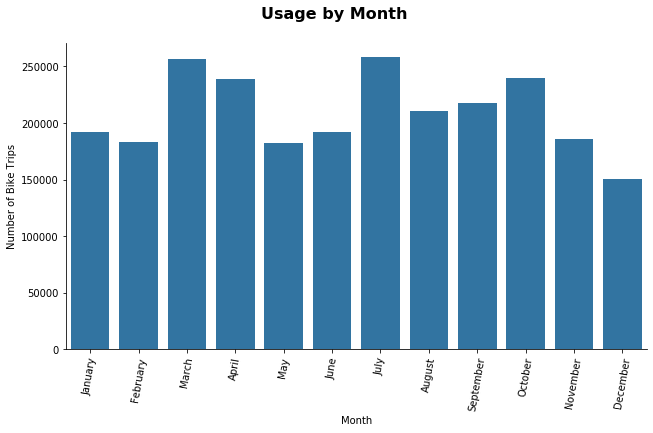

In [30]:
#Display monthly Ford Go Bike sharing system
graph = sb.catplot(data = df_cleaned, x = 'start_time_month', 
                   kind = 'count', color = sin_color, aspect = 1.8);
graph.set_axis_labels('Month', 'Number of Bike Trips'),
graph.fig.suptitle('Usage by Month',
                   y = 1.07, fontsize = 16, fontweight = 'bold');
graph.set_xticklabels(rotation=80)

### Observation 1:  Usage by Month

> In the Bay Area, July which is in Summer in the Northen Hemispher is the most popular time to use the Ford Go Bike sharing system. March is also the second most popular time to use the Ford Go Bike sharing system in the Bay Area. 

>While December which is Winter time in the Northern Hemisphere, is the least popular time to use the Ford Go Bike Sharing System. Therefore, there will be more bikes available due to the usuage of bikes not been used around the Christmas Holidays. 

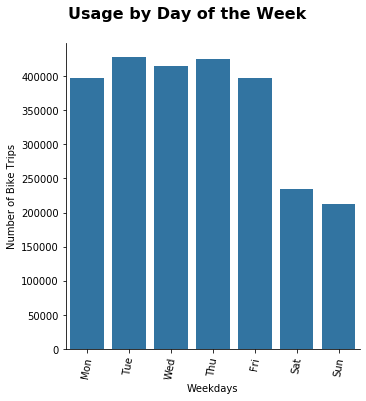

In [31]:
# Weekly usage of the Ford Go bike sharing system
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
graph = sb.catplot(data=df_cleaned, x='start_time_weekday', 
                   kind='count', color = sin_color, order = weekday)
graph.set_axis_labels('Weekdays', 'Number of Bike Trips')
graph.fig.suptitle('Usage by Day of the Week ',
                   y=1.07, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=80);

### Observation 2:  Usage by Month

In 2019, Monday through Friday has heavy usage in hiring bikes from the Ford Go Bike sharing system in the Bay Area. 
The usage drops significantly on the weekend where Saturday and Sunday. The data suggests that the Ford Go Bike sharing system is mainly used during the week. 

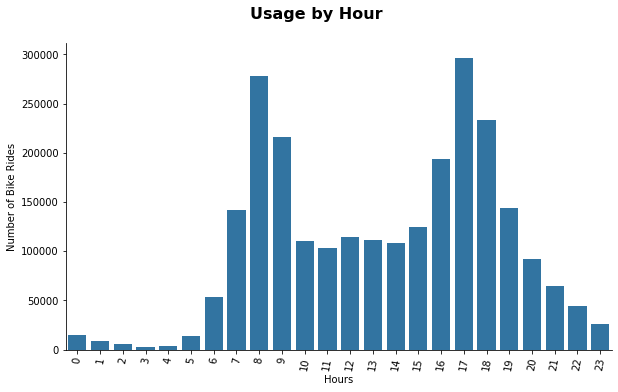

In [32]:
#Hourly usage of the Ford Go bike sharing system
graph = sb.catplot(data = df_cleaned, x='start_time_hour', 
                   kind='count', color = sin_color, aspect = 1.7)
graph.set_axis_labels('Hours', 'Number of Bike Rides')
graph.fig.suptitle('Usage by Hour', y=1.07, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=80);

### Observation 3: Usage by Hour 

> In 2019, the most popular times to ride bikes would during 0700-0900 and from 1600-1900. 
The highest usage time was at 0800 in the morning and at 1700 in the afternoon. 
The least used time of the bikes was at 0300. 

In [33]:
#Convert duration to minutes instead of seconds 
df_cleaned['duration_min'] = df_cleaned['duration_sec']/60
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 23 columns):
bike_id                    object
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             object
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
rental_access_method       category
start_station_id           object
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
start_time_month           object
start_time_month_num       int32
start_time_weekday         object
start_time_hour            int64
end_time_hour              int64
duration_min               float64
distance_km                float64
distance_miles             float64
dtypes: category(2), datetime64[ns](2), float64(7), int32(1), int64(3), object(8)


In [34]:
#finding the distribution 
df_cleaned.duration_min.describe()

count    2.506983e+06
mean     1.346081e+01
std      3.291190e+01
min      1.000000e+00
25%      5.983333e+00
50%      9.516667e+00
75%      1.478333e+01
max      1.520183e+04
Name: duration_min, dtype: float64

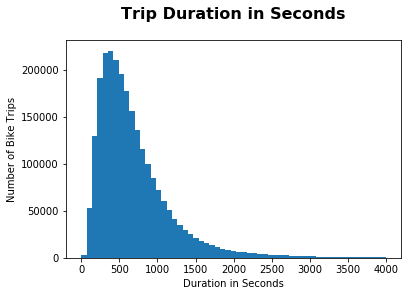

In [35]:
#Display the FordGoBike Trip Duration in Seconds 
bin_edges = np.arange(0, 4000, 70)
plt.hist(data = df_cleaned, x = 'duration_sec', bins = bin_edges);
plt.title("Trip Duration in Seconds", 
          y=1.07, fontsize=16, fontweight='bold')
plt.xlabel('Duration in Seconds')
plt.ylabel('Number of Bike Trips');
graph.set_xticklabels(rotation=80);

In [36]:
#Finding the distribution
df_cleaned.duration_min.describe(percentiles = [.95])
df_cleaned.duration_min.describe()

count    2.506983e+06
mean     1.346081e+01
std      3.291190e+01
min      1.000000e+00
25%      5.983333e+00
50%      9.516667e+00
75%      1.478333e+01
max      1.520183e+04
Name: duration_min, dtype: float64

In [37]:
#Find out the average trip
df_cleaned.duration_min.mean()


13.46080549808363

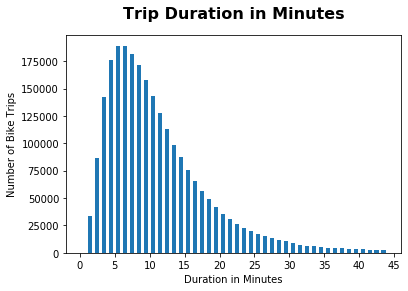

In [38]:
# Display the duration bike rides in minutes 
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = df_cleaned, x = 'duration_min', 
         bins = bin_edges, rwidth = 0.6);
plt.title("Trip Duration in Minutes", y=1.05, 
          fontsize=16, fontweight='bold')
plt.xlabel('Duration in Minutes')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');
graph.set_xticklabels(rotation=80);

### Observation 4: Duration of Bike Trips

> In 2019, the average duration of bike trips was under 13.46 minutes. 


In [39]:
df_cleaned.distance_miles.describe()


count    2.506983e+06
mean     1.347115e+00
std      4.815657e+01
min      0.000000e+00
25%      5.766851e-01
50%      9.032320e-01
75%      1.389988e+00
max      7.953380e+03
Name: distance_miles, dtype: float64

In [40]:
df_cleaned.distance_miles.mean()


1.347115165460442

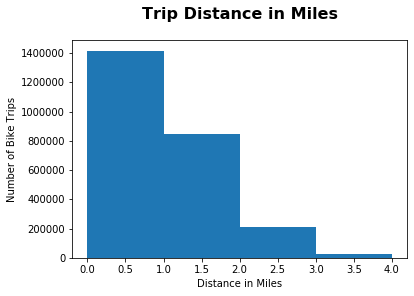

In [41]:
bin_edges = np.arange(0, 5, 1)
plt.hist(data = df_cleaned, x = 'distance_miles',
         bins = bin_edges);
plt.title("Trip Distance in Miles", y=1.07, 
          fontsize=16, fontweight='bold')
plt.xlabel('Distance in Miles')
plt.ylabel('Number of Bike Trips');
graph.set_xticklabels(rotation=80);

### Observation 5: Distance in Miles 
> In 2019, the mean of the distance traveled in miles was at 1.347 miles. 


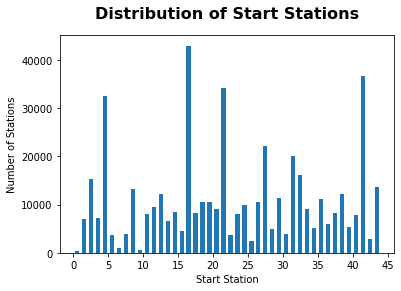

In [42]:
# Plotting start station id distribution.
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = df_cleaned, x = 'start_station_id', 
         bins = bin_edges, rwidth = 0.6);
plt.title("Distribution of Start Stations", y=1.05, 
          fontsize=16, fontweight='bold')
plt.xlabel('Start Station')
plt.xticks(ticks, labels)
plt.ylabel('Number of Stations');
graph.set_xticklabels(rotation=80);


     

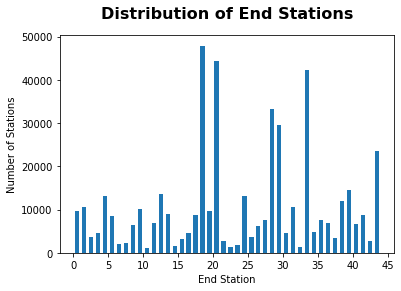

In [43]:
# Plotting end station id distribution.
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = df_cleaned, x = 'end_station_id', 
         bins = bin_edges, rwidth = 0.6);
plt.title("Distribution of End Stations", y=1.05, 
          fontsize=16, fontweight='bold')
plt.xlabel('End Station')
plt.xticks(ticks, labels)
plt.ylabel('Number of Stations');
graph.set_xticklabels(rotation=80);

### Observation 6: Distribution of Start and End Stations

> In 2019, through observing the Start and End station usages. The same stations usage is more frequent as start stations and end stations. 


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There were six observations that were made with the duration of the bike ride data. As the data was cleaned, through the data cleaning phase. The data visualisation of the duration of the bike ride and the distance helped to form a story. The trip duration takes a large amount of values and is concentrated.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Looking at the cleaned dataset, in Observation 6: start station and end station which is plotted to do a comparison of bike sharers frequency in start and end station. 


## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in the data.

In [45]:
# Clean the User Type data for data visualisation
customer = df_cleaned.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_cleaned.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df_cleaned['bike_id'].count()
subscriber_prop = subscriber / df_cleaned['bike_id'].count()

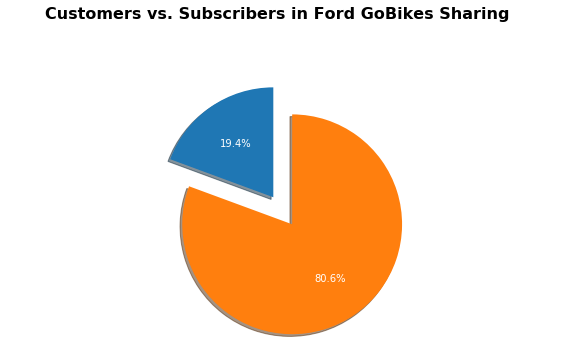

In [46]:
# Plot a pie chart to compare the percentage of Customers vs Subscribers that are using the platform
plt.figure(figsize = [10, 5])
labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
explode = (0, 0.3)
plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', 
        shadow=True, startangle=90, textprops={'color':'white'})
plt.axis('equal')
plt.suptitle('Customers vs. Subscribers in Ford GoBikes Sharing', y=1.07,
             fontsize=16, fontweight='bold');

### Observation 1: Customers vs. Subscribers in Ford GoBikes Sharing

> In 2019, 80.6% of the user types in the Ford GoBikes sharing platform were Subscribers. 19.4% of the user types in the Ford GoBikes Sharing Platform were Customers. 



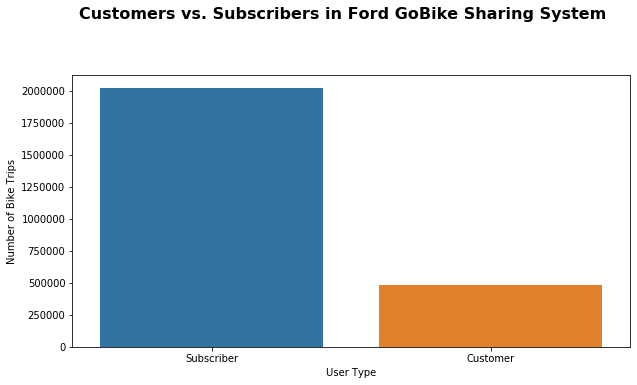

In [47]:
# Plot Number of Custoners vs Subscribers in the Ford GoBike Sharing app. 
plt.figure(figsize = [10, 5])
graph = sb.countplot(data = df_cleaned, x = "user_type", 
                     order = df_cleaned.user_type.value_counts().index);
graph.set_xlabel('User Type');
graph.set_ylabel('Number of Bike Trips');
plt.suptitle('Customers vs. Subscribers in Ford GoBike Sharing System', 
             y=1.07, fontsize=16, fontweight='bold');

### Observation 2: Customers vs. Subscribers Usage in Ford GoBikes Sharing

> There are more than 200,000 Subscribers as displayed in the Customers vs. Subscribers in Ford GoBike Sharing System chart.

<Figure size 864x360 with 0 Axes>

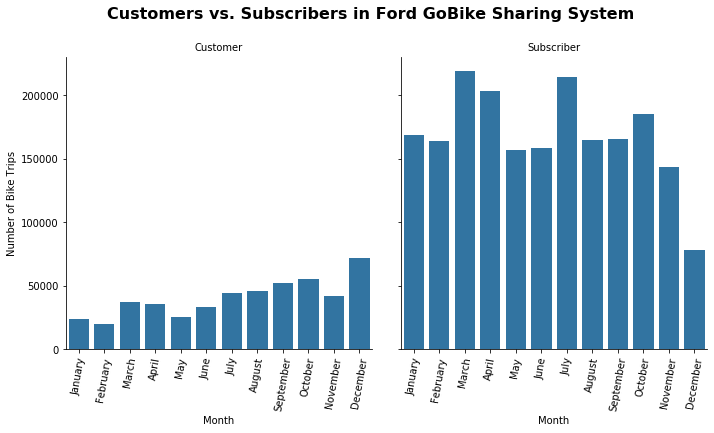

In [48]:
# Plot comparison of usage between Customers vs Subscribersin 2019
plt.figure(figsize = [12, 5])
graph = sb.catplot(data=df_cleaned, x='start_time_month', 
                   col="user_type", kind='count', sharey = True, color = sin_color);
graph.set_axis_labels("Month", "Number of Bike Trips");
graph.set_titles("{col_name}");
graph.fig.suptitle('Customers vs. Subscribers in Ford GoBike Sharing System',
                   y=1.07, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=80);

### Observation 3: Customers vs. Subscribers Usage in Ford GoBikes Sharing

> There are more than 200,000 Subscribers as displayed in the Customers vs. Subscribers in Ford GoBike Sharing System chart. 

Customers: The demand is high during December. However, the frequency is high betwen the months of July - October 2019.

Subscribers: The demand is highest in March 2019. THis is followed by July 2019 which is Summer time in the Bay Area and April which is Spring. 




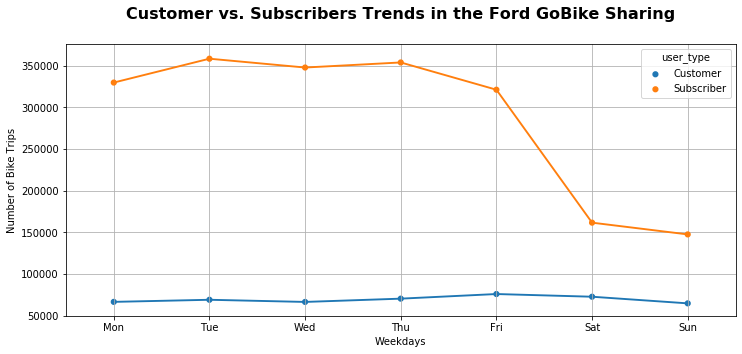

In [50]:
plt.figure(figsize=(12, 5))
df_cleaned_user_week = df_cleaned.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax = sb.pointplot(data=df_cleaned_user_week, x='start_time_weekday', 
                  y=0, hue = 'user_type', scale=.7, order = weekday);
plt.title('Customer vs. Subscribers Trends in the Ford GoBike Sharing', y=1.07, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

### Observation 4: Customers vs. Subscribers Trends in the Ford GoBikes Sharing
 
In 2019, customers usage is quite low and consistant staying under 10,000 bike trips during the week. While Subscribers frequently used the the Ford GoBikes Sharing platform during Monday - Thursday with a drop of the number of bike trips on Friday and a significant drop through to Saturday and Sunday. 


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The importance of including the user type to the data analysis revealed that there were some differences in the behaviour of the customers and subscribers using the Ford GoBikes Sharing platform. 

> The dataset highlights the usage trends between customers and subscribers. This suggests that Customers are casual users and the Subscribers are daily commuters that maybe working, studying etc. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Through Observation, there is a difference in usage between customers and subscribers. The popularity of using Ford GoBikes for Customers is usually in December and increases more on Saturday as opposed to Subscribers where it decreases significantly on Saturday and during the weekend. 
> There were some limitations in this analysis, due to the anomity of customer data shighuch as gender. 

## Step 5. Multivariate Exploration

> In this section, I will clean the data further in order to investigate the duration of the Ford Go Bike data.


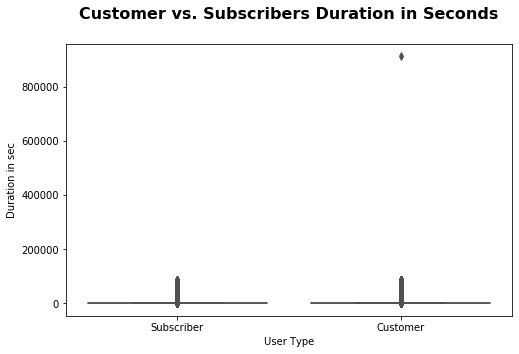

In [60]:
# Number of bike trips Customers vs. Subscriber Usage by Duration

plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.title('Customer vs. Subscribers Duration in Seconds', y=1.07, fontsize=16, fontweight='bold')
plt.xlabel('User Type')
plt.ylabel('Duration in sec')
plt.show()



### Obserevation 1:  Customers vs. Subscribers Ride Duration in Seconds

> In 2019, the graph above highlights that the values are vey widespread to see a box plot. In the next observation, will have a look at the box plot with the duration in minutes as opposed to seconds. 


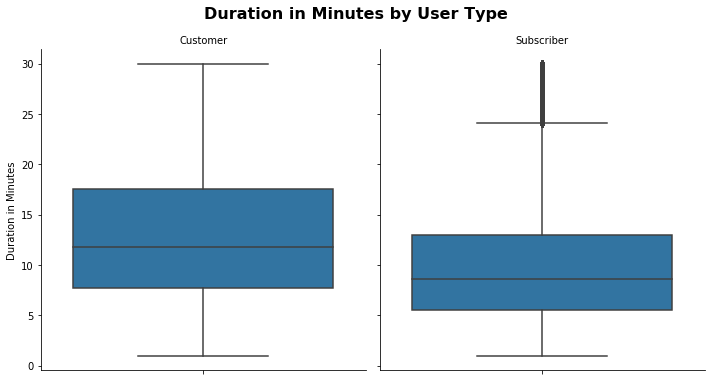

In [61]:
data = df_cleaned.query('duration_min < 30')
x = sb.catplot(data=data, y='duration_min', 
               col="user_type", kind='box', color = sin_color)
x.set_titles(col_template = '{col_name}')
x.set_axis_labels("", "Duration in Minutes")
x.fig.suptitle('Duration in Minutes by User Type',
               y=1.05, fontsize=16, fontweight='bold');

### Obserevation 2:  Duration in Minutes by User Type 

> The Duration in Minutes by User Type plot highlights that Customers normally have longer trip durations. Customers normally ride between 8 minutes and 18 minutes. Subscriber trips are normally shorter and last anywhere between 5-13 minutes. 


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Through further observation between Customer and Supplier behaviours, The Duration changes whether if it is noted down in seconds vs minutes.  
### Were there any interesting or surprising interactions between features?

> Through observation of the plot box if looking at Customer and Supplier duration in seconds. The box plot graph highlights that the values are vey widespread to see a box plot. By amending the duration from seconds to Minutes by the User Type highlights that Customers normally have longer trip durations. Customers normally ride between 8-18 minutes. Subscriber trips are normally shorter and last anywhere between 5-13 minutes



# References

1. How To Combine Multiple CSV Files In Python: https://sempioneer.com/python-for-seo/how-to-combine-multiple-csv-files-in-python/
2. FordGoBike Data Set: https://www.lyft.com/bikes/bay-wheels/system-data
3. Github: https://github.com/ijdev/Ford-GoBike-System-Data---Data-Analysis/blob/master/exploration_template.ipynb
4. Keggle: https://www.kaggle.com/chirag02/ford-gobike-data-analysis
5. seaborn catplot: https://seaborn.pydata.org/generated/seaborn.catplot.html
6. matplotlib Documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
